# CSGO Weapons Classification using CNN

## Loading libraries

In [156]:
import glob
import cv2
import os

In [157]:
import zipfile
import pathlib

In [158]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [159]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Importing Dataset

In [160]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [161]:
# importing train images
with zipfile.ZipFile('/content/drive/MyDrive/train_dir.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')
train_dir = pathlib.Path('/content/datasets/train_dir')
image_count = len(list(train_dir.glob('*/*')))
print(image_count)

827


In [162]:
# importing test images
with zipfile.ZipFile('/content/drive/MyDrive/test_dir.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')
test_dir = pathlib.Path('/content/datasets/test_dir')
image_count = len(list(test_dir.glob('*/*')))
print(image_count)

66


## Preprocessing

In [163]:
# processing will go 3 images per 3
batch_size = 3
# images resize as 200 square
img_height = 200
img_width = 200

In [164]:
# extracting train images
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

Found 827 files belonging to 33 classes.
Using 662 files for training.


In [165]:
# extracting test images
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 66 files belonging to 33 classes.
Using 13 files for validation.


In [166]:
# list of CSGO weapons
class_names = val_data.class_names
print(class_names)

['AK-47', 'AWP', 'Aug', 'CZ-75', 'Famas', 'Five_Seven', 'G3SG1', 'Galil-AR', 'Glock', 'M249', 'M4A1', 'M4A4', 'MAC-10', 'MP-5', 'MP-7', 'MP-9', 'Mag-7', 'Negev', 'Nova', 'P-2000', 'P-90', 'P250', 'Revolver', 'SG-553', 'Sawed-Off', 'Scar-20', 'Scout', 'Tec-9', 'UMP', 'USP', 'XM-1014', 'dual_pistol', 'pp']


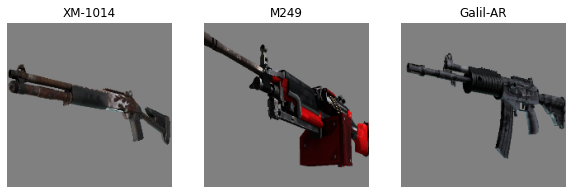

In [167]:
# sample of 3 weapons images with labels
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Building CNN

In [168]:
model = tf.keras.Sequential([
    # rescaling layer (normalization of the images)
    layers.experimental.preprocessing.Rescaling(1./255),
    # convolution (filtering images with matrix) 
    # max pooling layers (reducing size of images)
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    # flatten layer (construction of a vector from the matrix)
    layers.Flatten(),
    # dense layer (neurons layers)
    layers.Dense(64, activation='relu'),
    layers.Dense(33, activation='softmax')
])

In [169]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

## Training CNN

In [170]:
model.fit( 
  train_data,
  validation_data=val_data,
  epochs=20 # training the model on 20 epochs only
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


221/221 [==============================] - 4s 17ms/step - loss: 3.0504 - accuracy: 0.1964 - val_loss: 1.8576 - val_accuracy: 0.6154
Epoch 2/20
221/221 [==============================] - 4s 16ms/step - loss: 0.4336 - accuracy: 0.8882 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 3/20
221/221 [==============================] - 4s 16ms/step - loss: 0.0287 - accuracy: 0.9894 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 4/20
221/221 [==============================] - 4s 16ms/step - loss: 0.1893 - accuracy: 0.9577 - val_loss: 2.6248e-04 - val_accuracy: 1.0000
Epoch 5/20
221/221 [==============================] - 4s 16ms/step - loss: 3.7117e-04 - accuracy: 1.0000 - val_loss: 1.3207e-04 - val_accuracy: 1.0000
Epoch 6/20
221/221 [==============================] - 4s 16ms/step - loss: 1.1623e-04 - accuracy: 1.0000 - val_loss: 1.0139e-04 - val_accuracy: 1.0000
Epoch 7/20
221/221 [==============================] - 4s 16ms/step - loss: 7.8840e-05 - accuracy: 1.0000 - val_loss: 8.5876e-05 - val

In [171]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 98, 98, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 47, 47, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 44, 44, 32)       

## Making Predictions

Saving weapon_xm1014_sp_tape_dots_urban_light_large.751c1e2059e1b9b8ef64b4cd94b22e35cccd0477.png to weapon_xm1014_sp_tape_dots_urban_light_large.751c1e2059e1b9b8ef64b4cd94b22e35cccd0477.png


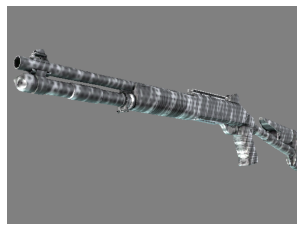


The weapon in the image is a XM-1014


In [172]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    res = np.argmax(model.predict(img_to_predict))
    print('\nThe weapon in the image is a', class_names[res])

Saving weapon_mp5sd_hy_labrat_mp5_light_large.bbdd9b7e1445618106b9709261787f8d800f7391.png to weapon_mp5sd_hy_labrat_mp5_light_large.bbdd9b7e1445618106b9709261787f8d800f7391.png


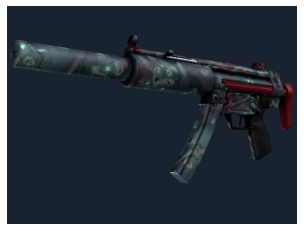


The weapon in the image is a MP-5


In [175]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    res = np.argmax(model.predict(img_to_predict))
    print('\nThe weapon in the image is a', class_names[res])

Saving joshua-jay-christie-08.jpg to joshua-jay-christie-08 (3).jpg


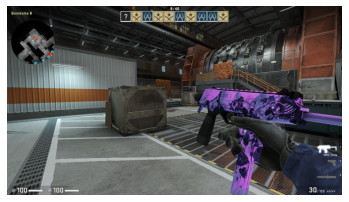


The weapon in the image is a Galil-AR


In [196]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    res = np.argmax(model.predict(img_to_predict))
    print('\nThe weapon in the image is a', class_names[res])

Saving 20180710183859_1.jpg to 20180710183859_1 (2).jpg


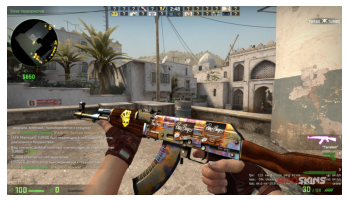


The weapon in the image is a UMP


In [200]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    res = np.argmax(model.predict(img_to_predict))
    print('\nThe weapon in the image is a', class_names[res])

## Saving Model

In [208]:
# saving model in working space
model.save('/content/model-csgo/')

INFO:tensorflow:Assets written to: /content/model-csgo/assets


INFO:tensorflow:Assets written to: /content/model-csgo/assets
